In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import statsmodels.api as sm # import statsmodels 
from sklearn import linear_model
from scipy import stats
import seaborn as sns
from scipy.stats import ttest_1samp

In [38]:
df = pd.read_csv('full.csv')
df = df[df['isMainSleep'] == 1]
df['week_start'] = pd.to_datetime(df['dataDate']).dt.to_period('W').apply(lambda r: r.start_time)

In [39]:
df

,idStudy,participID,dataDate,dataTime,fetchStamp,overallResultValue,heartMinsFound,sleepMinsFound,calMinsFound,stepMinsFound,...,timeInBed,minsAsleep,awakeDuration,efficiency,restlessCount,durationMS,restlessDuration,awakeCount,minutesAfterWakeup,week_start
0,6178,3LZGLG,2015-08-25,00:00:00,1441145130,3,1331,440,1440,1440,...,440,423,1,97,10,26400000,16,1,0,2015-08-24
1,6179,3LZGLG,2015-08-26,00:00:00,1441145132,3,1424,434,1440,1440,...,434,417,1,96,8,26040000,16,1,0,2015-08-24
2,6180,3LZGLG,2015-08-27,00:00:00,1441145134,3,1412,469,1440,1440,...,469,431,2,95,12,28140000,36,1,11,2015-08-24
3,6181,3LZGLG,2015-08-28,00:00:00,1441145136,3,1350,354,1440,1440,...,354,339,1,97,8,21240000,14,1,0,2015-08-24
4,6182,3LZGLG,2015-08-29,00:00:00,1441145138,3,1417,502,1440,1440,...,435,376,8,90,16,26100000,51,2,0,2015-08-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39459,109693,4GM577,2016-05-02,00:00:00,1462336876,3,1376,421,1440,1440,...,421,385,3,91,18,25260000,33,1,0,2016-05-02
39460,110680,4GM577,2016-05-03,00:00:00,1462509302,3,1306,418,1440,1440,...,418,379,2,91,17,25080000,37,2,0,2016-05-02
39461,110681,4GM577,2016-05-04,00:00:00,1462509306,3,1318,702,1440,1440,...,702,622,40,89,22,42120000,40,7,0,2016-05-02
39462,111759,4GM577,2016-05-05,00:00:00,1462767919,2,1268,410,1440,1440,...,410,380,0,93,16,24600000,30,0,3,2016-05-02


In [40]:
eff = df[['participID', 'dataDate', 'minsAsleep', 'week_start']]
eff


,participID,dataDate,minsAsleep,week_start
0,3LZGLG,2015-08-25,423,2015-08-24
1,3LZGLG,2015-08-26,417,2015-08-24
2,3LZGLG,2015-08-27,431,2015-08-24
3,3LZGLG,2015-08-28,339,2015-08-24
4,3LZGLG,2015-08-29,376,2015-08-24
...,...,...,...,...
39459,4GM577,2016-05-02,385,2016-05-02
39460,4GM577,2016-05-03,379,2016-05-02
39461,4GM577,2016-05-04,622,2016-05-02
39462,4GM577,2016-05-05,380,2016-05-02


In [41]:
eff = eff.groupby(['participID', 'week_start'], as_index=False).mean()
eff.head()

,participID,week_start,minsAsleep
0,3LZGLG,2015-08-24,413.666667
1,3LZGLG,2015-08-31,404.571429
2,3LZGLG,2015-09-07,396.285714
3,3LZGLG,2015-09-14,408.285714
4,3LZGLG,2015-09-21,418.714286


In [42]:
pivot = eff.pivot(index='participID', columns='week_start', values='minsAsleep')
pivot.head()

week_start,2015-08-24,2015-08-31,2015-09-07,2015-09-14,2015-09-21,2015-09-28,2015-10-05,2015-10-12,2015-10-19,2015-10-26,...,2016-02-29,2016-03-07,2016-03-14,2016-03-21,2016-03-28,2016-04-04,2016-04-11,2016-04-18,2016-04-25,2016-05-02
participID,,,,,,,,,,,,,,,,,,,,,
3LZGLG,413.666667,404.571429,396.285714,408.285714,418.714286,441.000000,458.428571,388.571429,504.833333,379.285714,...,412.428571,529.500000,318.428571,372.428571,336.000000,331.285714,352.857143,404.000000,465.714286,432.40
3LZJFK,377.400000,396.428571,386.428571,320.200000,391.142857,378.571429,396.500000,343.285714,406.000000,317.666667,...,381.571429,441.857143,350.500000,309.714286,359.285714,323.000000,295.500000,365.857143,393.833333,NaN
3LZRZQ,NaN,324.000000,327.500000,433.833333,425.000000,406.571429,432.142857,399.571429,418.750000,428.000000,...,445.200000,446.000000,464.285714,452.833333,437.142857,457.166667,447.857143,449.142857,436.000000,455.40
3M29ZH,458.800000,410.857143,449.400000,357.166667,395.000000,312.666667,422.750000,317.000000,517.200000,413.250000,...,423.200000,530.250000,370.000000,458.000000,448.600000,390.833333,410.000000,418.714286,433.600000,395.25
3M2QNS,433.500000,396.666667,402.000000,368.000000,377.200000,349.333333,392.600000,370.000000,375.000000,415.666667,...,422.000000,492.200000,398.428571,431.000000,369.000000,417.000000,466.250000,403.142857,468.800000,531.00


In [43]:
pivot_drop = pivot.dropna()
#68 participants who had at least one night of data from all 37 weeks 

In [44]:
pdrop= pivot_drop[(np.abs(stats.zscore(pivot_drop)) < 3).all(axis=1)]

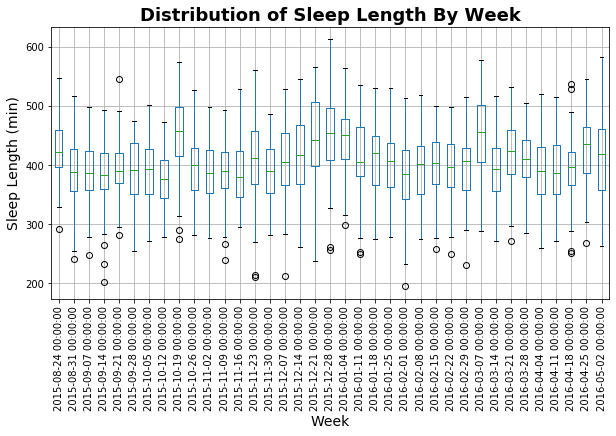

In [45]:
pdrop.boxplot(figsize=(10,5))
plt.xticks(rotation=90);
plt.title('Distribution of Sleep Length By Week', fontsize=18, fontweight='bold');
plt.ylabel('Sleep Length (min)', fontsize=14);
plt.xlabel('Week', fontsize=14);

In [46]:
def paired_t_test(before, after):
    ttest,pval = stats.ttest_rel(before, after)
    #print(pval)
    if pval<0.10:
        print("reject null hypothesis")
    #else:
    #    print("accept null hypothesis")

In [47]:
pd_flat = pdrop.reset_index()

In [48]:
weeks = pdrop.columns
l = len(weeks)
for index, obj in enumerate(weeks):
    if index < (l - 1):
        print(weeks[index+1])
        this_week = pd_flat[weeks[index]]
        next_week = pd_flat[weeks[index+1]]
        paired_t_test(this_week, next_week)

2015-08-31 00:00:00
reject null hypothesis
2015-09-07 00:00:00
2015-09-14 00:00:00
2015-09-21 00:00:00
reject null hypothesis
2015-09-28 00:00:00
2015-10-05 00:00:00
2015-10-12 00:00:00
reject null hypothesis
2015-10-19 00:00:00
reject null hypothesis
2015-10-26 00:00:00
reject null hypothesis
2015-11-02 00:00:00
2015-11-09 00:00:00
2015-11-16 00:00:00
2015-11-23 00:00:00
reject null hypothesis
2015-11-30 00:00:00
reject null hypothesis
2015-12-07 00:00:00
reject null hypothesis
2015-12-14 00:00:00
2015-12-21 00:00:00
reject null hypothesis
2015-12-28 00:00:00
2016-01-04 00:00:00
2016-01-11 00:00:00
reject null hypothesis
2016-01-18 00:00:00
2016-01-25 00:00:00
2016-02-01 00:00:00
reject null hypothesis
2016-02-08 00:00:00
reject null hypothesis
2016-02-15 00:00:00
2016-02-22 00:00:00
2016-02-29 00:00:00
2016-03-07 00:00:00
reject null hypothesis
2016-03-14 00:00:00
reject null hypothesis
2016-03-21 00:00:00
reject null hypothesis
2016-03-28 00:00:00
reject null hypothesis
2016-04-04 0

In [49]:
# checking normality: is paired t test the right thing to be doing?

In [50]:
def check_normal(before, after):
    diff = before - after
    diff.plot(kind='hist', title= 'Efficiency Difference')
    plt.show()

In [51]:
weeks = pdrop.columns
l = len(weeks)
for index, obj in enumerate(weeks):
    if index < (l - 1):
       # print(weeks[index+1])
        this_week = pd_flat[weeks[index]]
        next_week = pd_flat[weeks[index+1]]
       # check_normal(this_week, next_week)

## Wilcoxon Signed Rank Test
### No assumptions about normality

In [52]:
def wilcoxon_t_test(before, after, pvals):
    ttest,pval = stats.wilcoxon(before, after)
    #print(pval)
    if pval<0.10:
        print("reject null hypothesis")
    pvals.append(pval)
    #else:
    #    print("accept null hypothesis")stats.wilcoxon(df['bp_before'], df['bp_after'])

In [53]:
weeks = pdrop.columns
pvals = []
l = len(weeks)
for index, obj in enumerate(weeks):
    if index < (l - 1):
        print(weeks[index+1])
        this_week = pd_flat[weeks[index]]
        next_week = pd_flat[weeks[index+1]]
        wilcoxon_t_test(this_week, next_week, pvals)

2015-08-31 00:00:00
reject null hypothesis
2015-09-07 00:00:00
2015-09-14 00:00:00
reject null hypothesis
2015-09-21 00:00:00
reject null hypothesis
2015-09-28 00:00:00
2015-10-05 00:00:00
2015-10-12 00:00:00
reject null hypothesis
2015-10-19 00:00:00
reject null hypothesis
2015-10-26 00:00:00
reject null hypothesis
2015-11-02 00:00:00
2015-11-09 00:00:00
2015-11-16 00:00:00
2015-11-23 00:00:00
reject null hypothesis
2015-11-30 00:00:00
reject null hypothesis
2015-12-07 00:00:00
reject null hypothesis
2015-12-14 00:00:00
2015-12-21 00:00:00
reject null hypothesis
2015-12-28 00:00:00
2016-01-04 00:00:00
2016-01-11 00:00:00
reject null hypothesis
2016-01-18 00:00:00
2016-01-25 00:00:00
2016-02-01 00:00:00
reject null hypothesis
2016-02-08 00:00:00
reject null hypothesis
2016-02-15 00:00:00
2016-02-22 00:00:00
2016-02-29 00:00:00
2016-03-07 00:00:00
reject null hypothesis
2016-03-14 00:00:00
reject null hypothesis
2016-03-21 00:00:00
reject null hypothesis
2016-03-28 00:00:00
reject null 

In [54]:
w2w = weeks[1:]

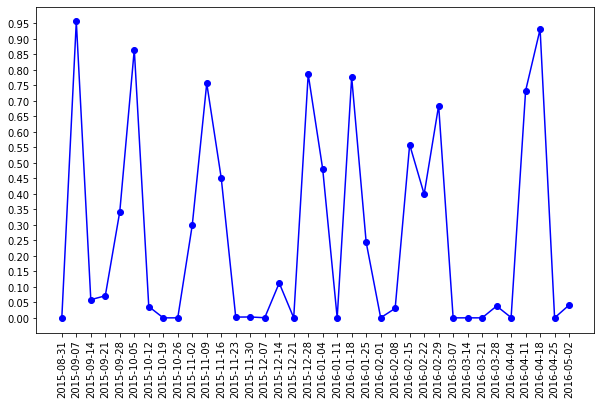

In [55]:
plt.figure(figsize=(10,6));
myplot = plt.plot(w2w, pvals, marker='o', color='blue')
plt.xticks(rotation=90);
plt.yticks(np.arange(0, 1, 0.05));
plt.xticks(w2w);
plt.show()

In [56]:
types = ['2nd Week Back'
         , 'Normal'
         , 'Normal'
         , 'Normal'
         , 'Normal'
         , 'Pre-Exams'
         , 'Exams'
         , 'Break'
         ,'Back from Break'
         , '2nd Week Back'
         , 'Normal'
         , 'Normal'
         , 'Break'
         , 'Back from Break'
         , 'Pre-Exams'
         , 'Exams'
         , 'Break'
         , 'Break'
         , 'Break'
         , 'Back from Break'
         , '2nd Week Back'
         , 'Normal'
         , 'Normal'
         , 'Normal'
         , 'Normal'
         , 'Pre-Exams'
         , 'Exams'
         , 'Break'
         , 'Back from Break'
         , '2nd Week Back'
         , 'Back from Break'
         , '2nd Week Back'
         , 'Normal'
         , 'Normal'
         , 'Pre-Exams'
         , 'Exams']


In [57]:
w = w2w.map(lambda x: str(x)[0:10])

In [58]:
df_type = pd.DataFrame([w, types])
df_type

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,2015-08-31,2015-09-07,2015-09-14,2015-09-21,2015-09-28,2015-10-05,2015-10-12,2015-10-19,2015-10-26,2015-11-02,...,2016-02-29,2016-03-07,2016-03-14,2016-03-21,2016-03-28,2016-04-04,2016-04-11,2016-04-18,2016-04-25,2016-05-02
1,2nd Week Back,Normal,Normal,Normal,Normal,Pre-Exams,Exams,Break,Back from Break,2nd Week Back,...,Exams,Break,Back from Break,2nd Week Back,Back from Break,2nd Week Back,Normal,Normal,Pre-Exams,Exams


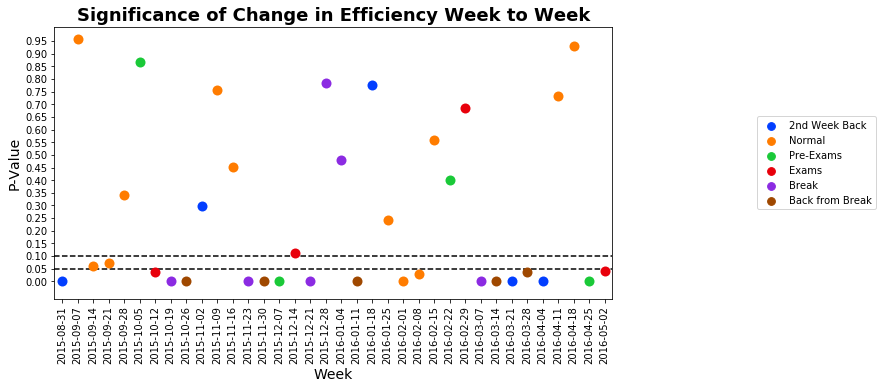

In [59]:
plt.figure(figsize=(10,5));
g = sns.swarmplot(x=w, y=pvals, hue=types, size = 10, palette= 'bright');
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1);
plt.xticks(rotation=90);
plt.yticks(np.arange(0, 1, 0.05));
plt.axhline(y=.1, xmin=0, xmax=1, color='black', linestyle='--');
plt.axhline(y=.05, xmin=0, xmax=1, color='black', linestyle='--');
plt.xlabel('Week', fontsize=14);
plt.ylabel('P-Value', fontsize=14);
plt.title('Significance of Change in Efficiency Week to Week', fontsize=18, fontweight='bold');

## Compare to "population" average

In [60]:
pd_flat.mean()

week_start
2015-08-24    424.590152
2015-08-31    387.542893
2015-09-07    388.857179
2015-09-14    380.339250
2015-09-21    396.065729
2015-09-28    389.020346
2015-10-05    387.825361
2015-10-12    374.884488
2015-10-19    451.547294
2015-10-26    394.832035
2015-11-02    390.212085
2015-11-09    390.239683
2015-11-16    388.329437
2015-11-23    409.666378
2015-11-30    387.455123
2015-12-07    405.225613
2015-12-14    413.743687
2015-12-21    448.353056
2015-12-28    448.808874
2016-01-04    444.023379
2016-01-11    409.719949
2016-01-18    410.553896
2016-01-25    402.957215
2016-02-01    382.176732
2016-02-08    394.464250
2016-02-15    399.351263
2016-02-22    398.863528
2016-02-29    393.256674
2016-03-07    453.524603
2016-03-14    393.241703
2016-03-21    419.625361
2016-03-28    408.146573
2016-04-04    391.714250
2016-04-11    392.862193
2016-04-18    394.872475
2016-04-25    429.000216
2016-05-02    409.862374
dtype: float64

In [61]:
def compareMean(weekData, pvals):
    tset, pval = ttest_1samp(weekData, pd_flat.mean().mean())
    pvals.append(pval)
    print(pval)
    if pval < 0.05:    # alpha value is 0.05 or 5%
        print(" we are rejecting null hypothesis")
    #else:
        #print("we are accepting null hypothesis")

In [62]:
weeks = pdrop.columns
pvals = []
for w in weeks:
    print(w)
    this_week = pd_flat[w]
    compareMean(this_week, pvals)

2015-08-24 00:00:00
0.0015910453426938292
 we are rejecting null hypothesis
2015-08-31 00:00:00
0.010395853502449504
 we are rejecting null hypothesis
2015-09-07 00:00:00
0.01446567866111083
 we are rejecting null hypothesis
2015-09-14 00:00:00
0.0006396466777390993
 we are rejecting null hypothesis
2015-09-21 00:00:00
0.14559336187313515
2015-09-28 00:00:00
0.019527805781503326
 we are rejecting null hypothesis
2015-10-05 00:00:00
0.008841287454989388
 we are rejecting null hypothesis
2015-10-12 00:00:00
3.717718559507285e-06
 we are rejecting null hypothesis
2015-10-19 00:00:00
3.730788716040476e-07
 we are rejecting null hypothesis
2015-10-26 00:00:00
0.11519691469098421
2015-11-02 00:00:00
0.027660217615438232
 we are rejecting null hypothesis
2015-11-09 00:00:00
0.024211193638891657
 we are rejecting null hypothesis
2015-11-16 00:00:00
0.018077271592704756
 we are rejecting null hypothesis
2015-11-23 00:00:00
0.6031969830627164
2015-11-30 00:00:00
0.004370129595445819
 we are reje

In [63]:
types1 = [
          '2nd Week Back'
         , 'Normal'
         , 'Normal'
         , 'Normal'
         , 'Normal'
         , 'Pre-Exams'
         , 'Exams'
         , 'Break'
         ,'Back from Break'
         , '2nd Week Back'
         , 'Normal'
         , 'Normal'
         , 'Break'
         , 'Back from Break'
         , 'Pre-Exams'
         , 'Exams'
         , 'Break'
         , 'Break'
         , 'Break'
         , 'Back from Break'
         , '2nd Week Back'
         , 'Normal'
         , 'Normal'
         , 'Normal'
         , 'Normal'
         , 'Pre-Exams'
         , 'Exams'
         , 'Break'
         , 'Back from Break'
         , '2nd Week Back'
         , 'Back from Break'
         , '2nd Week Back'
         , 'Normal'
         , 'Normal'
         , 'Pre-Exams'
         , 'Exams']

In [64]:
ww = [str(x)[0:10] for x in weeks];

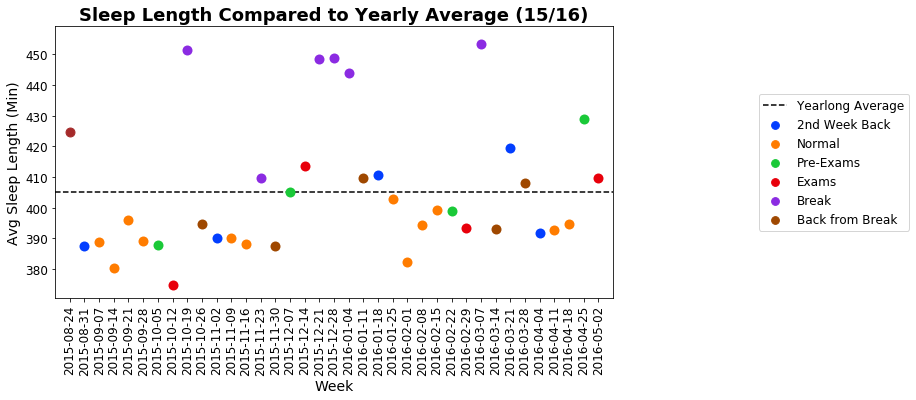

In [75]:
plt.figure(figsize=(10,5));
g = sns.swarmplot(x=np.arange(1, 37), y=pd_flat.mean()[1:], hue=types1, size = 10, palette= 'bright');
plt.xlim(-2, 36);
plt.scatter(-1, pd_flat.mean()[0], marker='o', s=80, color='brown');
plt.xticks(range(-1, len(ww)-1),ww, fontsize=12);
plt.xticks(rotation=90);
plt.yticks(fontsize=12)
#plt.yticks(np.arange(0, 1, 0.05));
plt.axhline(y= pd_flat.mean().mean(), xmin=0, xmax=1, color='black', linestyle='--', label='Yearlong Average');
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1, fontsize=12);
plt.xlabel('Week', fontsize=14);
plt.ylabel('Avg Sleep Length (Min)', fontsize=14);
plt.title('Sleep Length Compared to Yearly Average (15/16)', fontsize=18, fontweight='bold');
plt.savefig('Figure6', dpi=300, bbox_inches="tight")